In [1]:
import numpy as np
import tensorflow as tf
# page 415 around hands on ml 3

2023-01-01 13:23:26.308339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [3]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [5]:
# Doing Normalizing by Dividing 255.0
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Ankle boot'

### Creating the Model using the Sequential API

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

### Training and Evaluating the Model

In [11]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7156 - accuracy: 0.7651 - val_loss: 0.5032 - val_accuracy: 0.8292
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4864 - accuracy: 0.8307 - val_loss: 0.4509 - val_accuracy: 0.8364
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4396 - accuracy: 0.8451 - val_loss: 0.4213 - val_accuracy: 0.8530
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4138 - accuracy: 0.8551 - val_loss: 0.3959 - val_accuracy: 0.8622
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.8612 - val_loss: 0.3873 - val_accuracy: 0.8614
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3747 - accuracy: 0.8677 - val_loss: 0.3941 - val_accuracy: 0.8604
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3620 - accuracy: 0.8709 - val_loss: 0.3693 - val_accuracy:

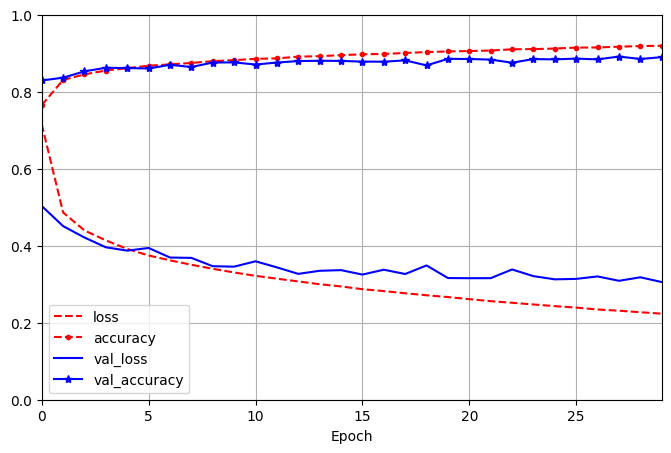

In [12]:
# page 418 
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [13]:
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.715618,0.765127,0.503201,0.8292
1,0.486436,0.830655,0.450935,0.8364
2,0.439584,0.845055,0.421263,0.8530
3,0.413812,0.855091,0.395876,0.8622
4,0.391630,0.861164,0.387303,0.8614


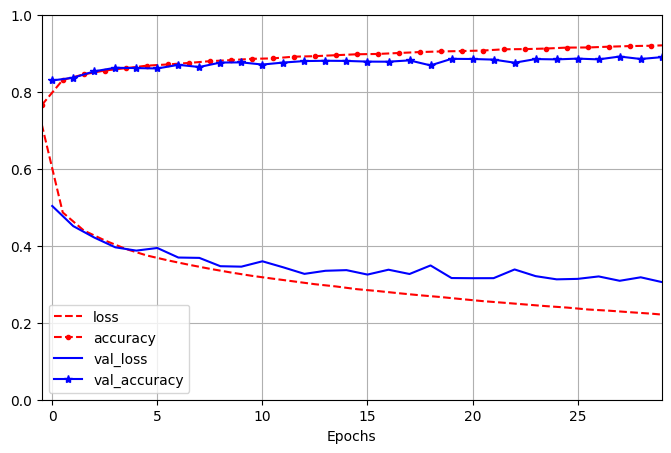

In [14]:
# Extra COde 
# Shows how to shift the training curve by 1/2 epoch

plt.figure(figsize=(8,5))
for key, style in zip(history.history, ['r--', 'r--.', "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith('val_') else -0.5)
    plt.plot(epochs, history.history[key], style, label = key)
    
plt.xlabel("Epochs")
plt.axis([-0.5,29, 0. , 1])
plt.legend(loc = "lower left")
plt.grid()
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 787us/step - loss: 0.3484 - accuracy: 0.8820


[0.3483703136444092, 0.8820000290870667]

### Using the Model to make Predictions

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 47ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
y_proba

array([[5.97029498e-07, 3.10553645e-08, 7.11518240e-08, 4.20104520e-08,
        2.86228214e-07, 4.95962217e-04, 1.73192433e-07, 5.25013602e-04,
        1.05522158e-05, 9.98967171e-01],
       [2.43933959e-04, 2.69937388e-08, 9.83367682e-01, 9.35812139e-09,
        1.63314268e-02, 3.60975902e-11, 5.68631403e-05, 1.16410895e-07,
        3.04647685e-08, 1.30310179e-10],
       [8.83039718e-07, 9.99999046e-01, 4.64037385e-11, 2.01426644e-08,
        1.11021791e-07, 1.35415724e-12, 3.91096426e-11, 4.40586641e-13,
        5.17099030e-10, 3.10497965e-13]], dtype=float32)

In [18]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [19]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [20]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

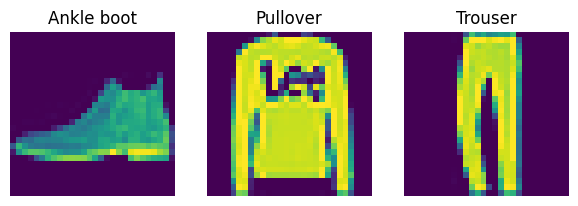

In [21]:
# Extra Code this cell generates and saves Figure 10-12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3, index +1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_names[y_test[index]])

## Building a Regression MLP Using the Sequential API

In [23]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape= X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer, 
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer=optimizer, metrics = ["RootMeanSquaredError"])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.6088 - root_mean_squared_error: 2.9341 - val_loss: 8.4241 - val_root_mean_squared_error: 2.9026
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3081 - root_mean_squared_error: 2.8824 - val_loss: 8.3961 - val_root_mean_squared_error: 2.8978
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2883 - root_mean_squared_error: 2.8789 - val_loss: 8.4078 - val_root_mean_squared_error: 2.8998
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2815 - root_mean_squared_error: 2.8778 - val_loss: 8.4522 - val_root_mean_squared_error: 2.9074
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2741 - root_mean_squared_error: 2.8765 - val_loss: 8.3939 - val_root_mean_squared_error: 2.8974
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2646 - root_mean_squared_error: 2.8749 - val_loss: 8

## Building Complex Models Using the Functional API

In [24]:
# page 423
# Build a Neural Network to tackle the California housing problem

In [31]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer  = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat  = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(input_)



In [32]:
# page 425
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer= optimizer, metrics = ["RootMeanSquaredError"])

In [36]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

ValueError: in user code:

    File "/home/krish/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_preprocessing_layer.py", line 123, in adapt_step  *
        self.update_state(data)
    File "/home/krish/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/preprocessing/normalization.py", line 318, in update_state  **
        self.adapt_mean * existing_weight + batch_mean * batch_weight

    ValueError: Dimensions must be equal, but are 5 and 28 for '{{node add_1}} = AddV2[T=DT_FLOAT](mul, mul_1)' with input shapes: [5], [5,28].
